 #### Chi Squared Distribution


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ncx2, chi2
from scipy.special import iv
from time import perf_counter

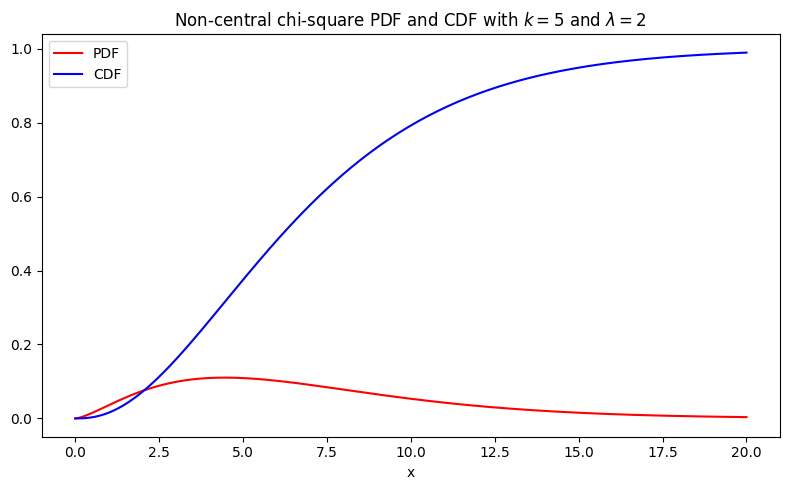

In [7]:
# --- Parameters ---
k = 5        # degrees of freedom
lmbda = 2    # non-centrality parameter
a = 0        # left truncation
b = 20       # right truncation
ngrid = 200  # number of grid intervals

# --- Define grid ---
deltax = (b - a) / ngrid
x = np.arange(a, b + deltax, deltax)

# --- Compute PDF and CDF ---
f = ncx2.pdf(x, df=k, nc=lmbda)
F = ncx2.cdf(x, df=k, nc=lmbda)

# --- Plot ---
plt.figure(figsize=(8, 5))
plt.plot(x, f, 'r', label='PDF')
plt.plot(x, F, 'b', label='CDF')
plt.xlabel('x')
plt.title(r'Non-central chi-square PDF and CDF with $k={k}$ and $\lambda={lmbda}$'.format(k=k, lmbda=lmbda))
plt.legend()
plt.tight_layout()
plt.show()

$$
f_{\chi^{\prime 2}_{k,\lambda}}(x)
= \frac{1}{2} e^{-\frac{x + \lambda}{2}}
\left( \frac{x}{\lambda} \right)^{\frac{k}{4} - \frac{1}{2}}
I_{\frac{k}{2} - 1}\!\left( \sqrt{\lambda x} \right),
$$

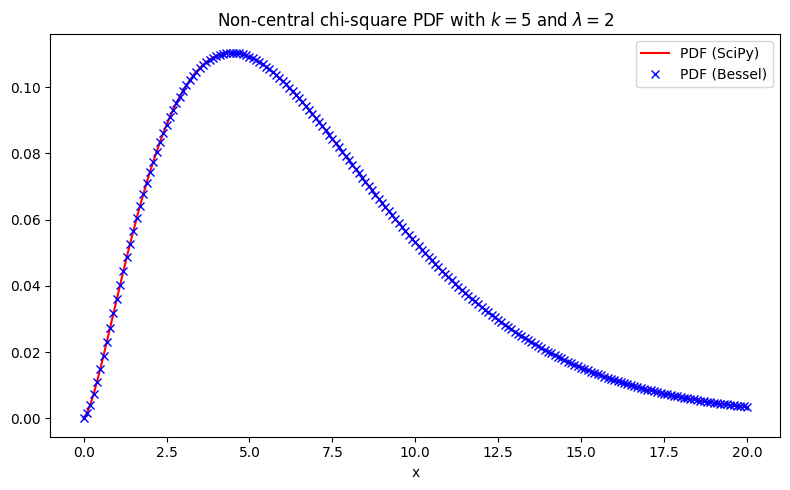

In [21]:
# a) Modified Bessel Function of the first kind

a = np.exp(-(x + lmbda) / 2)
b = x / lmbda
c = (k / 4) - 0.5
v = (k / 2) - 1
z = np.sqrt(lmbda * x)
I = iv(v, z)

f_b = 0.5 * a * b**c * I

plt.figure(figsize=(8, 5))
plt.plot(x, f, 'r', label='PDF (SciPy)')
plt.plot(x, f_b, 'bx', label='PDF (Bessel)')
plt.xlabel('x')
plt.title(r'Non-central chi-square PDF with $k={k}$ and $\lambda={lmbda}$'.format(k=k, lmbda=lmbda))
plt.legend()
plt.tight_layout()
plt.show()

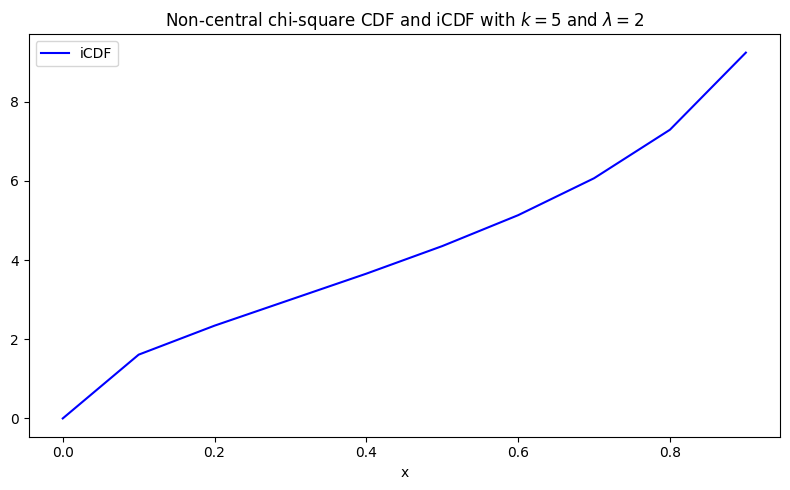

In [27]:
# b) i) Chi Squared ICDF Plot

iF = chi2.ppf(x, df=k, loc=0, scale=1)

plt.figure(figsize=(8, 5))
# plt.plot(x, F, 'r', label='CDF')
plt.plot(x, iF, 'b', label='iCDF')
plt.xlabel('x')
plt.title(r'Non-central chi-square CDF and iCDF with $k={k}$ and $\lambda={lmbda}$'.format(k=k, lmbda=lmbda))
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
# b) ii) Chi Squared ICDF sample

n = 200_000    # number of samples for timing; increase if you like
rng = np.random.default_rng(42)

U = rng.random(n)
X_b = ncx2.ppf(U, df=k, nc=lmbda)

print(X_b)

[ 9.66728676  5.59352887 11.45935449 ...  3.38102342  2.46250281
  1.56382716]


In [32]:
# c) Chi Squared random variates

X_c = ncx2.rvs(df=k, nc=lmbda, size=n, random_state=rng)

print(X_c)

[ 4.76630282  7.95926618  8.22828635 ...  1.82700051  9.07265582
 12.88775312]


In [36]:
# d) Chi Squared generalisation equations

# Definition: sum_{i=1}^k (Z_i + mu_i)^2, with sum mu_i^2 = lambda
# Easiest is mu = (sqrt(lambda), 0, ..., 0)
Z = rng.standard_normal(size=(n, k))
mu = np.zeros(k)
mu[0] = np.sqrt(lmbda)
X_d = np.sum((Z + mu)**2, axis=1)

print(Z)
print(X_d)

[[ 0.47870232 -0.01039728 -0.5619081   0.98210036 -0.29323735]
 [ 0.21636172 -1.55770097 -1.03299495  1.30878096 -1.12420015]
 [ 0.08952237 -1.38953164 -1.8528536  -0.41018341  0.19170594]
 ...
 [-0.1172911  -0.22587697  0.27264479  1.00222891  0.94756646]
 [-1.31427004  0.64002803 -0.90466743  0.03333999 -2.02089776]
 [-0.33016573 -1.3349152   2.17155392  0.62988211  0.04344151]]
[4.9494886  9.12902019 7.83008799 ... 3.70970843 5.32318707 8.07144337]


In [39]:
# e) Timing comparison
def time_it(fn, repeats=3):
    best = float("inf")
    out = None
    for _ in range(repeats):
        t0 = perf_counter()
        out = fn()
        best = min(best, perf_counter() - t0)
    return best, out

t_b, _ = time_it(lambda: ncx2.ppf(rng.random(n), df=k, nc=lmbda))
t_c, _ = time_it(lambda: ncx2.rvs(df=k, nc=lmbda, size=n, random_state=rng))

def gen_def():
    Z = rng.standard_normal(size=(n, k))
    mu = np.zeros(k); mu[0] = np.sqrt(lmbda)
    return np.sum((Z + mu)**2, axis=1)
t_d, _ = time_it(gen_def)

print(f"Timing, n={n}:  (b) ppf={t_b:.3f}s   (c) rvs={t_c:.3f}s   (d) def={t_d:.3f}s")

Timing, n=200000:  (b) ppf=0.364s   (c) rvs=0.004s   (d) def=0.012s
